In [1]:
import tensorflow as tf
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [2]:
import numpy as np
from tensorflow.keras.models import load_model
from keras.models import model_from_json
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [4]:
model = model_from_json(open("Saved_model/model2.json", "r").read())  
model.load_weights('Saved_model/Orange_Fruit_Weights2.h5')

In [5]:
#processing image for input

def process_image(path):
  img = load_img(path, target_size = (64,64))
  img_tensor = img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis = 0)
  img_tensor/=255.0
  return img_tensor


#predicting class of image
def show(pred,img):

  if pred>0.5: str = 'dected: Orange '
  else: str = 'dected: Not Orange'

  plt.imshow(img)
  plt.axis('off')
  plt.title(str)
  plt.show()

In [6]:
def predictor(path):
    pred = model.predict(process_image(path))
    img_original = load_img(path)
    return show(pred, img_original)

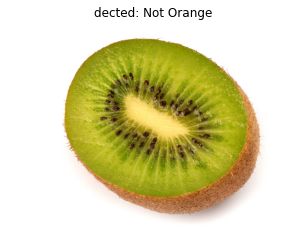

In [7]:
predictor("Images/kiwi.jpg")

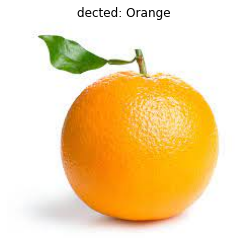

In [23]:
predictor("Images/orange2.jfif")

In [8]:
import tkinter as tk
from tkinter import filedialog, Text
import os
from PIL import ImageTk, Image


root = tk.Tk()  #body of app (which will hold it)
root.title("Orange Fruit CLassifier")
canvas = tk.Canvas(root, height=700, width=700, bg="#263D42")
canvas.pack()

#####
def addImage():
    addImage.filename = filedialog.askopenfilename(initialdir=os.getcwd(), title="Select Image",
    filetype = (("jpg image", "*.jpg"),("png image","*.png"), ("all files", "*.*")) )

    img = Image.open(addImage.filename)
    img.thumbnail((350, 350))
    img = ImageTk.PhotoImage(img)
    lbl.configure(image = img)
    lbl.image = img



def prectict():   
    if model.predict(process_image(addImage.filename))>0.5: txt = 'dected: Orange '
    else: txt = 'dected: Not Orange'

    lbl2= tk.Label(frame, text = txt, bg="gray", width=50)
    lbl2.pack()



####

#divs using frames
frame = tk.Frame(root, bg="white")
#relwidth = width of frame
#relx, rely = distance from corners of root frame to new frame
frame.place(relwidth = 0.7, relheight = 0.7, relx=0.1, rely=0.1)
lbl =tk.Label(frame)
lbl.pack(side = tk.LEFT)


##buttons
openFile = tk.Button(root, text="Open Image",
            padx=10, pady=5, fg="white", bg="#263D42", command = addImage)
openFile.pack(side = tk.LEFT)

runApp = tk.Button(root, text="Classify", padx=10, pady=5, fg="white", bg="#263D42", command = prectict)
runApp.pack(side = tk.LEFT, padx=10)

exi = tk.Button(root, text="Exit", padx=10, pady=5, fg="white", bg="#263D42",command= lambda: exit() )

exi.pack(side = tk.RIGHT)



root.mainloop()